# Ex. 1.1 - Integrali con metodi Monte Carlo

## Campionamento di una distribuzione di probabilità uniforme

In questi esercizi sono stati risolti alcuni semplici integrali unidimensionali $I = \int_{[0,1]}f(x)dx$ definiti sull'intervallo reale [0,1] mediante l'approccio statistico dei metodi Monte Carlo (MC). Questi ultimi permettono di ottenere una stima dell'integrale definito e dell'errore sulla stima dovuto all'utilizzo di un metodo statistico. 

Il metodo MC di cui si è fatto uso in questi esercizi è il più semplice e generico e consiste nel campionare la distribuzione di probabilità uniforme sull'intervallo reale [0,1) per generare il set di variabili casuali $S = \{x_{i}\}$ su cui viene calcolata la funzione integranda $f$. Si calcola quindi la stima dell'integrale $I$ utilizzando la media aritmetica:
$$F_M=\frac{1}{M}\sum_{i}^{M}f(x_i)$$
dove $M$ è il numero di punti campionati, ovvero il numero di passi MC realizzati.

Per calcolare l'errore $\epsilon$ sulla stima di $I$ si sfrutta il fatto che le $\{f(x_i)\}$ sono realizzazioni di variabili casuali indipendenti ed identicamente distribuite (IID) - in questo caso secondo una distribuzione uniforme - e che $F_M$ si ottiene come media aritmetica di queste RV. Sono quindi soddisfatte le ipotesi del teorema del limite centrale (a patto di prendere $M$ sufficientemente grande), che garantisce che l'errore commesso nello stimare il valor medio di $f$ è $\epsilon = \sigma_f/\sqrt{M}$, dove
$$\sigma^2_f=\int_{[0,1]}f^{2}(x)dx - I^2$$

Il problema, a questo punto, consiste nel valutare la $\sigma^2_f$. Una via potrebbe essere calcolare $\sigma^2_f$ con lo stimatore media aritmetica, in maniera analoga a quanto fatto per la stima di $I$. 

Altrimenti, si utilizza il cosiddetto $\textit{blocking method}$, che consiste nel suddividere gli $M$ step MC in $N$ blocchi. In ciascun blocco, come si è fatto in precedenza, è possibile ottenere una stima di $I$ mediante $L=M/N$ passi MC e ottenere quindi, in totale, $N$ stime $F_{L}$ di $I$. Il teorema del limite centrale è quindi applicabile anche alle nuove RV $\{F_{L i}\}$, IID con varianza $\sigma^2_{F_L} \sim \frac{1}{N}\sum_{i}^{N}F_{Li}^2 - (\frac{1}{N}\sum_{i}^{N}F_{Li})^2 $ e per le quali vale $F_M=\frac{1}{N}\sum_{i}^{N}F_{L i}$. È possibile quindi calcolare l'errore $\epsilon$ sulla stima di $I$ come:
$$\epsilon=\frac{\sigma_{F_L}}{\sqrt{N}} \simeq \sqrt{\frac{1}{N} \left[ \frac{1}{N} \sum_{i=1}^N F^2_{Li} - \left( \frac{1}{N} \sum_{i=1}^N F_{Li} \right)^2 \right]}$$
Ovviamente $\frac{\sigma_{F_L}}{\sqrt{N}}\simeq \frac{\sigma_{f}}{\sqrt{L}\sqrt{N}}\simeq \frac{\sigma_{f}}{\sqrt{M}}$ (sempre a patto che siano soddisfatte le hp del teorema del limite centrale).

Il metodo del $\textit{blocking}$ risulta necessario nel caso in cui le RV generate a ciascun passo MC presentino delle correlazioni, poichè quest'ultime fanno cadere l'ipotesi di indipendenza su cui si fonda il teorema del limite centrale. Suddividere il campione in blocchi più piccoli ed effettuare le medie su questi permette di eliminare le correlazioni, a patto di scegliere blocchi sufficientemente grandi (cioè $N'\gg$ del tempo di correlazione in unità di passi MC).

L'approccio è estendibile al caso di integrali a più dimensioni e, anzi, risulta particolarmente conveniente, se non necessario, nei casi in cui la dimensionalità $D$ del sistema è grande. È possibile dimostrare, infatti, che l'errore statistico associato all'uso di metodi MC non scala con $D$. 

### Es. 1.1.1 - Stima di $\langle r \rangle=\int_0^1rdr = 1/2$
In questo semplice caso l'integrale è risolvibile analiticamente ed è quindi possibile confrontare il valore stimato con quello teorico per testare il generatore di numeri (pseudo)casuali. 
- passi MC totali $M=10^5$
- numero di blocchi $N=100$ ($1000$ passi per blocco)

Di seguito si mostra il grafico della stima di $\langle r \rangle-1/2$ - con relativo errore statistico - in funzione del numero di blocchi.

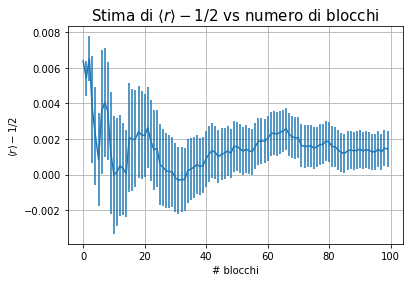

Miglior stima di <r>:  0.501 +/- 0.001
Valore teorico di <r> = 0.5


In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import decimal

# caricamento da file della stima di <r> e dell'errore sulla stima di <r> in funzione del blocco 
ave_mean, err_ave_mean = np.loadtxt("Output/mean.out", usecols=(0,1), delimiter = ' ', unpack = 'true')

N = len(ave_mean)
x = np.arange(N)

# grafico di <r>-0.5 in funzione del blocco
plt.errorbar(x,ave_mean-0.5,yerr=err_ave_mean)
plt.xlabel('# blocchi')
plt.ylabel('$\\langle r\\rangle - 1/2$')
plt.title('Stima di $\\langle r\\rangle -1/2$ vs numero di blocchi',size=15)
plt.grid(True)
plt.show()

print("Miglior stima di <r>: ",round(ave_mean[N-1],3),"+/-",round(err_ave_mean[N-1],3))
print("Valore teorico di <r> = 0.5")

### Es. 1.1.2 - Stima di $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$
Per il calcolo di questo integrale sono stati usati gli stessi parametri dell'esercizio precedente. Di seguito si mostra il grafico della stima di $\sigma^2-1/12$ - con relativo errore statistico - in funzione del numero di blocchi.

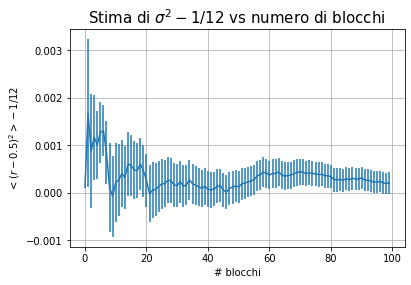

Miglior stima di <(r-0.5)^2>:  0.0835 +/- 0.0002
Valore teorico di <(r-0.5)^2> =  0.08333333333333333


In [12]:
# caricamento da file della stima di <(r-0.5)^2> e dell'errore sulla stima di <(r-0.5)^2> in funzione del blocco 
ave_var, err_ave_var = np.loadtxt("Output/var.out", usecols=(0,1), delimiter = ' ', unpack = 'true')

N = len(ave_var)
x = np.arange(N)

# grafico di <(r-0.5)^2>-1/12 in funzione del blocco
plt.errorbar(x,ave_var-1/12,yerr=err_ave_var)
plt.xlabel('# blocchi')
plt.ylabel('$<(r-0.5)^2>-1/12$')
plt.title('Stima di $\\sigma^2 -1/12$ vs numero di blocchi',size=15)
plt.grid(True)
plt.show()

print("Miglior stima di <(r-0.5)^2>: ",round(ave_var[N-1],4),"+/-",round(err_ave_var[N-1],4))
print("Valore teorico di <(r-0.5)^2> = ",1/12)

In entrambi i casi le stime coincidono con il valore teorico con uno scarto inferiore all'errore statistico, o al massimo 2 volte l'errore (a seconda della sequenza generata). Possiamo confrontare gli errori stimati con quelli che si ricavano teoricamente applicando il teorema del limite centrale a partire dal valore $\sigma_f$ (definita sopra) calcolato analiticamente. Ad esempio, nel caso di $\langle r \rangle$:

- $\sigma_r=\sqrt{1/12}$
- $\epsilon_{teo}=\frac{\sigma_r}{\sqrt{M}}=\frac{\sqrt{1/12}}{\sqrt{10^5}}\simeq0.0009$
- $\epsilon_{MC}=0.001$
I due valori di $\epsilon$ sono quindi in accordo.


### Es. 1.1.1 - Calcolo del $\chi^2$
In questo esercizio si è testata l'uniformità del generatore di numeri casuali sull'intervallo $[0,1)$ attraverso il calcolo del $\chi^2$, definito come:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

dove $M$ è il numero di sotto intervalli (identici) in cui è stato suddiviso l'intervallo di integrazione $[0,1]$, $n$ il numero di lanci totali (punti generati) e $n_i$ il numero di punti generati appartenenti all'intervallo $i$-esimo. Nel caso di punti generati in maniera uniforme, ci si aspetta che il valor medio di $n_i$ sia $n/M$ e che il valor medio di $(n_i - n/M)^2$ sia $n/M$. Ciò implica che $\chi^2 \simeq M$.

È stato stimato il $\chi^2$ utilizzando $S=100$ blocchi da $n=10^4$ lanci ciascuno e suddividendo l'intervallo $[0,1)$ in $M=100$ sottointervalli.
Ci si aspetta quindi un valore di $\chi^2\simeq100$.

Di seguito si riporta il grafico di $\chi^2$ in funzione del numero di blocchi.


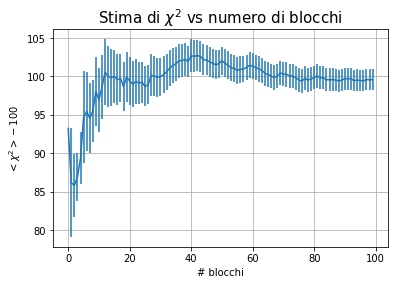

Miglior stima di <Chi^2>:  100.0 +/- 1.0


In [13]:
# caricamento da file della stima del Chi-quadro e dell'errore in funzione del blocco 
ave_chi, err_ave_chi = np.loadtxt("Output/chi.out", usecols=(0,1), delimiter = ' ', unpack = 'true')

N = len(ave_chi)
x = np.arange(N)

# grafico della stima del Chi-quadro in funzione del blocco
plt.errorbar(x,ave_chi,yerr=err_ave_chi)
plt.xlabel('# blocchi')
plt.ylabel('$<\chi^2>-100$')
plt.title('Stima di $\\chi^2$ vs numero di blocchi',size=15)
plt.grid(True)
plt.show()

print("Miglior stima di <Chi^2>: ",round(ave_chi[N-1],0),"+/-",round(err_ave_chi[N-1],0))

Il risultato mostra che il generatore di numeri casuali soddisfa l'ipotesi di uniformità.